In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cmocean as cm
from xgcm import Grid
import netCDF4 as nc


In [2]:
ave = False ## True means use 5 daily average rather than hourly prog
def open_files(folder):
    base = folder
    if ave:
        prog = xr.open_dataset(base + '/ave_prog.nc')
    else:
        prog = xr.open_dataset(base + '/prog.nc')
    ocean_static = xr.open_dataset(base + "/ocean_geometry.nc")
    return prog, ocean_static


In [3]:
label = './'
prog, ocean_static = open_files(label)

grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)# find horizontal speed
def find_speed(prog):
    # interpolate speeds to the same grid
    uo_interp = grid.interp(prog.u,'x',boundary='extend')
    vo_interp = grid.interp(prog.v,'y',boundary='extend')
    horiz_speed = np.sqrt(uo_interp**2+vo_interp**2)
    return horiz_speed
horiz_speed = find_speed(prog)

if ave:
    Time = (np.arange(len(prog.Time)))*5
else:
    Time = (np.arange(len(prog.Time)))/24

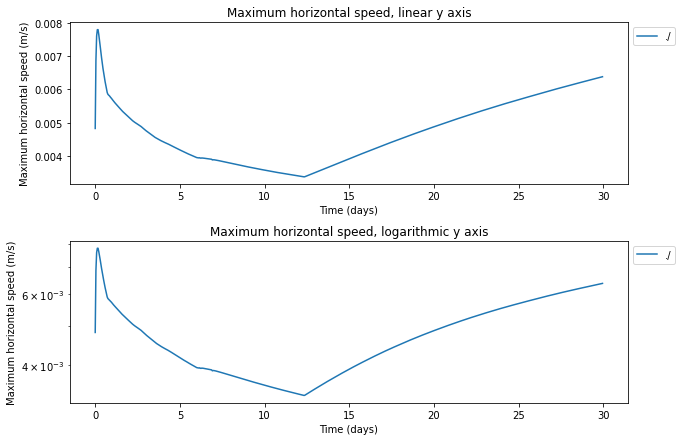

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7))
linestyle = '-'
axes[0].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)
axes[1].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)

        
axes[0].set_ylabel('Maximum horizontal speed (m/s)')
axes[0].set_xlabel('Time (days)')
axes[0].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[0].set_title('Maximum horizontal speed, linear y axis')

axes[1].set_yscale('log')
axes[1].set_ylabel('Maximum horizontal speed (m/s)')
axes[1].set_xlabel('Time (days)')
axes[1].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[1].set_title('Maximum horizontal speed, logarithmic y axis')

fig.subplots_adjust(hspace=0.35)
plt.show()


Make topo mask

In [23]:
IC = xr.open_dataset('../sigmashelfz-ISOMIPtopo-shelf-tsconfigfile/MOM_IC.nc')
depth = IC.rename({'eta':'depth'}).depth.isel(Interface = -1,Time = 0)*-1
depth
#depth.plot()
depth.to_netcdf('INPUT/ISOMIP-topo-file.nc')

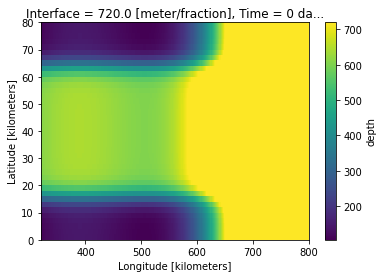

In [24]:
depth.plot()

In [179]:
label = './'
prog, ocean_static = open_files(label)

grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)# find horizontal speed
def find_speed(prog):
    # interpolate speeds to the same grid
    uo_interp = grid.interp(prog.u,'x',boundary='extend')
    vo_interp = grid.interp(prog.v,'y',boundary='extend')
    horiz_speed = np.sqrt(uo_interp**2+vo_interp**2)
    return horiz_speed
horiz_speed = find_speed(prog)

if ave:
    Time = (np.arange(len(prog.Time)))*5
else:
    Time = (np.arange(len(prog.Time)))/24

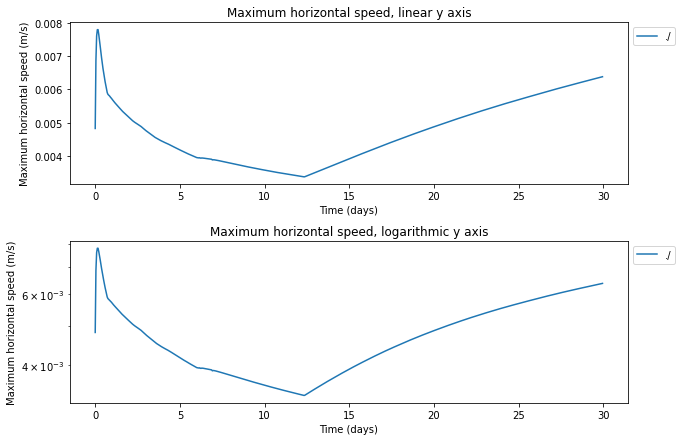

In [180]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7))
linestyle = '-'
axes[0].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)
axes[1].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)

        
axes[0].set_ylabel('Maximum horizontal speed (m/s)')
axes[0].set_xlabel('Time (days)')
axes[0].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[0].set_title('Maximum horizontal speed, linear y axis')

axes[1].set_yscale('log')
axes[1].set_ylabel('Maximum horizontal speed (m/s)')
axes[1].set_xlabel('Time (days)')
axes[1].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[1].set_title('Maximum horizontal speed, logarithmic y axis')

fig.subplots_adjust(hspace=0.35)
plt.show()


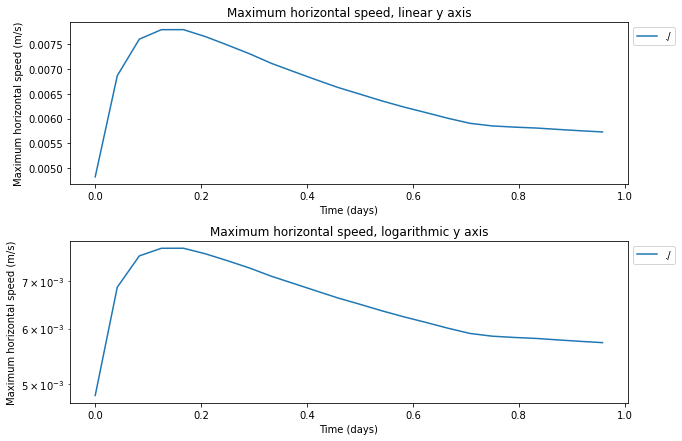

In [26]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7))
linestyle = '-'
axes[0].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)
axes[1].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)

        
axes[0].set_ylabel('Maximum horizontal speed (m/s)')
axes[0].set_xlabel('Time (days)')
axes[0].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[0].set_title('Maximum horizontal speed, linear y axis')

axes[1].set_yscale('log')
axes[1].set_ylabel('Maximum horizontal speed (m/s)')
axes[1].set_xlabel('Time (days)')
axes[1].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[1].set_title('Maximum horizontal speed, logarithmic y axis')

fig.subplots_adjust(hspace=0.35)
plt.show()


## add TOPO_EDITS??

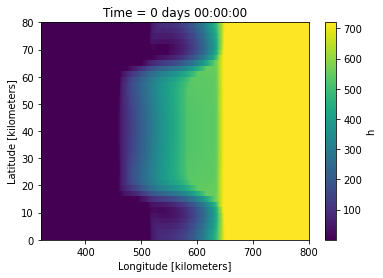

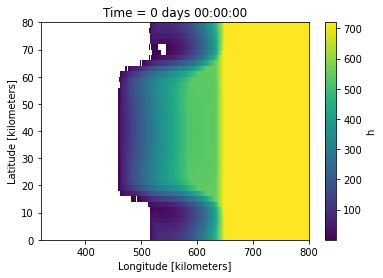

In [178]:
#Want to mask land when h small

IC = xr.open_dataset('../sigmashelfz-ISOMIPtopo-shelf-tsconfigfile/MOM_IC.nc')
h = IC.h.isel(Time = 0).sum('Layer')
h.plot()
plt.show()
h.where(h > 1e-2).plot()

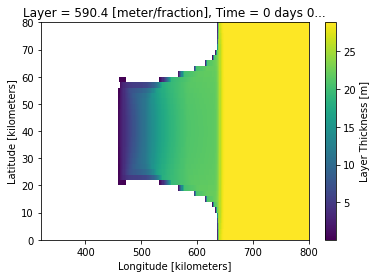

In [149]:
#Want to mask land when h small

IC = xr.open_dataset('../sigmashelfz-ISOMIPtopo-shelf-tsconfigfile/MOM_IC.nc')
h = IC.h.isel(Layer = 20,Time = 0)
h.where(h>0.0001).plot()

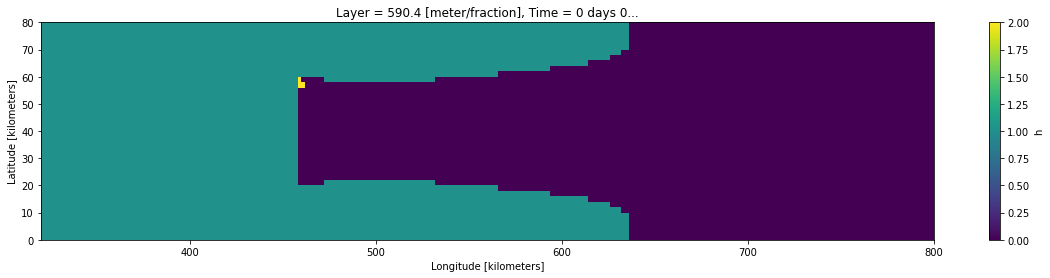

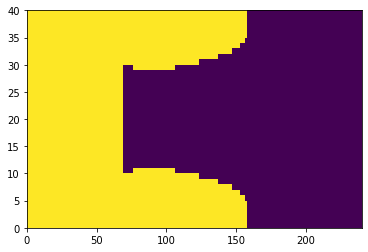

In [156]:
mask = (h.where(h>0.0001)*0-1).fillna(0)+1
mask[29,69]=2
mask[28,69:71]=2
# mask[8,69]=2
# mask[8,70]=2
# mask[28,70]=2
# mask[28,69]=2
# mask[29,69]=2
# mask[30,69:71]=2
# mask[31,69:75]=2
# mask[31,77]=2
# mask[32,90]=2
# mask[33,98]=2
# mask[34,97:100]=2
# mask[35,98]=2
# mask[34,108:112]=2
# mask[35,105:112]=2
# mask[36:38,97]=2
# mask[39,97]=2

#mask[:8,97]=2


fig = plt.figure(figsize = (20,4))
mask.plot()
plt.show()
mask = mask.values
mask[mask == 2] = 0
plt.pcolormesh(mask)

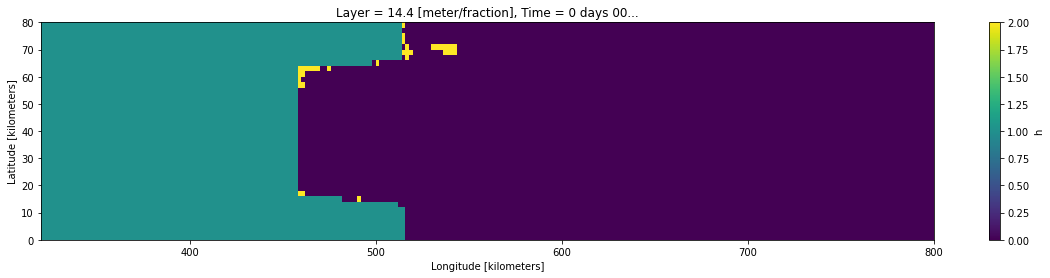

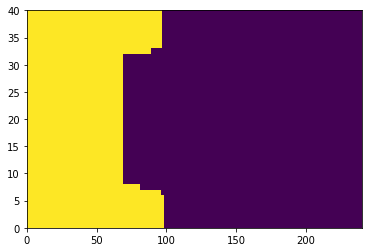

In [137]:
# fine mask

# mask = (h.where(h>0.0001)*0-1).fillna(0)+1
# mask[7,85]=2
# mask[8,69]=2
# mask[8,70]=2
# mask[28,70]=2
# mask[28,69]=2
# mask[29,69]=2
# mask[30,69:71]=2
# mask[31,69:75]=2
# mask[31,77]=2
# mask[32,90]=2
# mask[33,98]=2
# mask[34,97:100]=2
# mask[35,98]=2
# mask[34,108:112]=2
# mask[35,105:112]=2
# mask[36:38,97]=2
# mask[39,97]=2

# #mask[:8,97]=2


# fig = plt.figure(figsize = (20,4))
# mask.plot()
# plt.show()
# mask = mask.values
# mask[mask == 2] = 0
# plt.pcolormesh(mask)

In [157]:
mask = np.swapaxes(mask,0,1)

In [158]:
### Make a topography edit file for use with TOPO_EDITS_FILE option
### Land mask input as numpy array ed, of dimension NX x NY, with
### elements 1 for land and 0 otherwise
def make_topo_edits(ed, filename):
    nx, ny = ed.shape
    
    iE, jE = np.asarray(ed==1).nonzero()
    new_topog = nc.Dataset(filename, "w", format="NETCDF4")
    new_topog.createDimension("nEdit", len(iE))
    
    new_topog.createVariable("ni","int")
    new_topog.createVariable("nj","int")
    new_topog.createVariable("iEdit","int",("nEdit"))
    new_topog.createVariable("jEdit","int",("nEdit"))
    new_topog.createVariable("zEdit","f8",("nEdit"))

    new_topog["ni"][:] = nx
    new_topog["nj"][:] = ny
    
    new_topog["zEdit"][:] = np.zeros(len(iE))
    
    new_topog["jEdit"][:] = jE
    new_topog["iEdit"][:] = iE
    
    new_topog.close()

In [159]:
make_topo_edits(mask,'INPUT/Topo_edits.nc')

In [160]:
label = './'
prog, ocean_static = open_files(label)

grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)# find horizontal speed
def find_speed(prog):
    # interpolate speeds to the same grid
    uo_interp = grid.interp(prog.u,'x',boundary='extend')
    vo_interp = grid.interp(prog.v,'y',boundary='extend')
    horiz_speed = np.sqrt(uo_interp**2+vo_interp**2)
    return horiz_speed
horiz_speed = find_speed(prog)

if ave:
    Time = (np.arange(len(prog.Time)))*5
else:
    Time = (np.arange(len(prog.Time)))/24

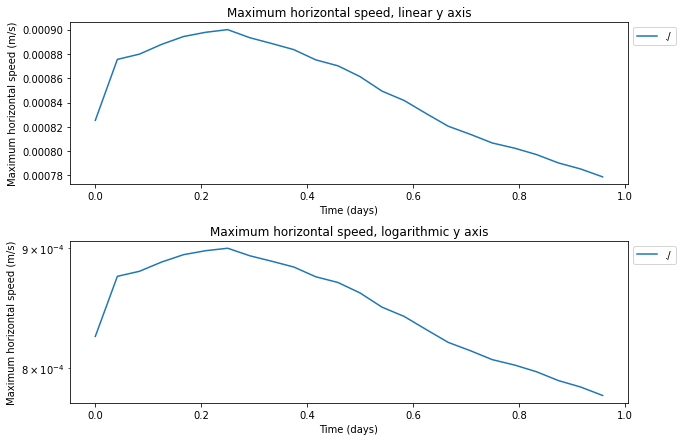

In [161]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,7))
linestyle = '-'
axes[0].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)
axes[1].plot(Time,horiz_speed.max(['zl','xh','yh']),label = label, linestyle = linestyle)

        
axes[0].set_ylabel('Maximum horizontal speed (m/s)')
axes[0].set_xlabel('Time (days)')
axes[0].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[0].set_title('Maximum horizontal speed, linear y axis')

axes[1].set_yscale('log')
axes[1].set_ylabel('Maximum horizontal speed (m/s)')
axes[1].set_xlabel('Time (days)')
axes[1].legend(bbox_to_anchor = (1,1),loc = 'upper left')
axes[1].set_title('Maximum horizontal speed, logarithmic y axis')

fig.subplots_adjust(hspace=0.35)
plt.show()


In [162]:
### 3D depiction of topography and ice shelf
### depends on MOM6 output in IC_FILE and SHELF_IC_FILE
def display_config():
    
    ic = xr.open_dataset(label + "/"+ IC_FILE)
    ms = xr.open_dataset(label + "/" + SHELF_IC_FILE)
    prog = xr.open_dataset(label + "/" + PROG_FILE) # need this as land mask info not in ic or ms

    LY, LX = ic.h.data[0].shape[1], ic.h.data[0].shape[2]
    YY= np.arange(0, LY, 1)
    XX = np.arange(0, LX, 1)
    XX, YY = np.meshgrid(XX, YY)

    fig, axes = plt.subplots(nrows = 1, ncols=3, figsize = (10,4), subplot_kw={"projection": "3d"})

    surf = axes[0].plot_surface(XX, YY, ms.thick.data)
    axes[0].set_title("ICE DRAFT h")

    eta = ic.eta[0].data[0]
    bathyT = eta - np.sum(ic.h[0].data, axis=0)
    
    mask = np.isnan(prog.h[0][0].data)
    eta[mask]=np.nan
    bathyT[mask]=np.nan

    axes[1].plot_surface(XX, YY, eta)
    axes[1].plot_surface(XX, YY, bathyT)

    axes[1].set_title("TOPOGRAPHY and ICE SHELF")
    
    axes[2].plot_surface(XX, YY, mask, color="C1")
    axes[2].set_title("Land MASK")

    ms.close()
    ic.close()
    prog.close()
IC_FILE = 'MOM_IC.nc'
TOPO_FILE = '/INPUT/ISOMIP-topo-file.nc.nc'
SHELF_IC_FILE = '/INPUT/Ocean1_3D.nc'
TOPO_EDITS_FILE = '/INPUT/Topo_edits.nc'
PROG_FILE = 'prog.nc'

/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_23251/720728762.py:26: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  axes[1].plot_surface(XX, YY, eta)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_23251/720728762.py:27: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  axes[1].plot_surface(XX, YY, bathyT)


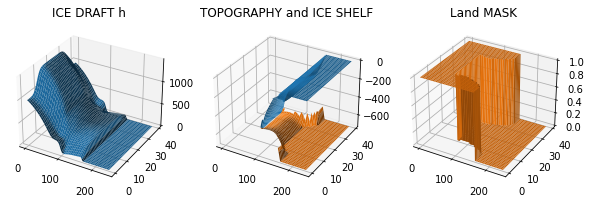

In [163]:
display_config()
